In [11]:
import pandas as pd

In [12]:
def get_headers():
    infile = open("CDC_data.csv","r")
    header = infile.readline()
    headers = header.strip().split(",")
    return headers

In [13]:
def get_count_d(county_d, county):
    my_d = {}
    for key in county_d[county]:
        raceDict = {}
        for item in county_d[county][key]:
            raceDict[item] = raceDict.get(item, 0) + 1
        my_d[key] = raceDict
    return my_d

In [14]:
def get_top_county_d():
    county_d = {}
    infile = open("counties.csv",'r')
    lines = infile.readlines()
    county_names = []
    for line in lines:
        tokens = line.strip().split(",")
        county_names.append(tokens[0].upper())
        county_d[tokens[0].upper()] = {}
    return county_d, county_names
county_d, county_names = get_top_county_d()  

races = ["White","Black","Multiple/Other","Asian","American Indian/Alaska Native","Native Hawaiian/Other Pacific Islander"]
ageGroups = ["18 to 49 years","50 to 64 years","0 - 17 years","65+ years"]
for i in range(0, len(county_names)):
    if (i == 0):
        print("    if (county == '" + county_names[i] + "' and race in races and age_group in ageGroups):")
        print("        county_d['" + county_names[i] + "'].setdefault(age_group,[]).append(race)")
    else:
        print("    elif (county == '" + county_names[i] + "' and race in races and age_group in ageGroups):")
        print("        county_d['" + county_names[i] + "'].setdefault(age_group,[]).append(race)")

    if (county == 'LOS ANGELES' and race in races and age_group in ageGroups):
        county_d['LOS ANGELES'].setdefault(age_group,[]).append(race)
    elif (county == 'MARICOPA' and race in races and age_group in ageGroups):
        county_d['MARICOPA'].setdefault(age_group,[]).append(race)
    elif (county == 'COOK' and race in races and age_group in ageGroups):
        county_d['COOK'].setdefault(age_group,[]).append(race)
    elif (county == 'MIAMI-DADE' and race in races and age_group in ageGroups):
        county_d['MIAMI-DADE'].setdefault(age_group,[]).append(race)
    elif (county == 'ORANGE' and race in races and age_group in ageGroups):
        county_d['ORANGE'].setdefault(age_group,[]).append(race)
    elif (county == 'CLARK' and race in races and age_group in ageGroups):
        county_d['CLARK'].setdefault(age_group,[]).append(race)
    elif (county == 'RIVERSIDE' and race in races and age_group in ageGroups):
        county_d['RIVERSIDE'].setdefault(age_group,[]).append

In [16]:
county_d, county_names = get_top_county_d()
infile = open("CDC_data.csv","r")
header = infile.readline()
headers = header.strip().split(",")
#print(headers)
count = 0
lines = []
while (True):
    line = infile.readline().strip()
    tokens = line.split(",")
    if (len(tokens) > 1):
        county = tokens[headers.index("res_county")]
        if county in county_names:
            lines.append(line)
    if (line == ""):
        break

races = ["White","Black","Multiple/Other","Asian","American Indian/Alaska Native","Native Hawaiian/Other Pacific Islander"]
ageGroups = ["18 to 49 years","50 to 64 years","0 - 17 years","65+ years"]
for line in lines:
    tokens = line.strip().split(",")
    county = tokens[headers.index("res_county")]
    age_group = tokens[headers.index("age_group")]
    race = tokens[headers.index("race")]
    if (county == 'LOS ANGELES' and race in races and age_group in ageGroups):
        county_d['LOS ANGELES'].setdefault(age_group,[]).append(race)
    elif (county == 'MARICOPA' and race in races and age_group in ageGroups):
        county_d['MARICOPA'].setdefault(age_group,[]).append(race)
    elif (county == 'COOK' and race in races and age_group in ageGroups):
        county_d['COOK'].setdefault(age_group,[]).append(race)
    elif (county == 'MIAMI-DADE' and race in races and age_group in ageGroups):
        county_d['MIAMI-DADE'].setdefault(age_group,[]).append(race)
    elif (county == 'ORANGE' and race in races and age_group in ageGroups):
        county_d['ORANGE'].setdefault(age_group,[]).append(race)
    elif (county == 'CLARK' and race in races and age_group in ageGroups):
        county_d['CLARK'].setdefault(age_group,[]).append(race)
    elif (county == 'RIVERSIDE' and race in races and age_group in ageGroups):
        county_d['RIVERSIDE'].setdefault(age_group,[]).append(race)
    elif (county == 'SAN DIEGO' and race in races and age_group in ageGroups):
        county_d['SAN DIEGO'].setdefault(age_group,[]).append(race)
    elif (county == 'KINGS' and race in races and age_group in ageGroups):
        county_d['KINGS'].setdefault(age_group,[]).append(race)
    elif (county == 'SAN BERNARDINO' and race in races and age_group in ageGroups):
        county_d['SAN BERNARDINO'].setdefault(age_group,[]).append(race)
    elif (county == 'SUFFOLK' and race in races and age_group in ageGroups):
        county_d['SUFFOLK'].setdefault(age_group,[]).append(race)
    elif (county == 'MONTGOMERY' and race in races and age_group in ageGroups):
        county_d['MONTGOMERY'].setdefault(age_group,[]).append(race)
    elif (county == 'QUEENS' and race in races and age_group in ageGroups):
        county_d['QUEENS'].setdefault(age_group,[]).append(race)
    elif (county == 'MIDDLESEX' and race in races and age_group in ageGroups):
        county_d['MIDDLESEX'].setdefault(age_group,[]).append(race)
    elif (county == 'WASHINGTON' and race in races and age_group in ageGroups):
        county_d['WASHINGTON'].setdefault(age_group,[]).append(race)
    elif (county == 'BROWARD' and race in races and age_group in ageGroups):
        county_d['BROWARD'].setdefault(age_group,[]).append(race)
    elif (county == 'FRANKLIN' and race in races and age_group in ageGroups):
        county_d['FRANKLIN'].setdefault(age_group,[]).append(race)
    elif (county == 'JEFFERSON' and race in races and age_group in ageGroups):
        county_d['JEFFERSON'].setdefault(age_group,[]).append(race)
    elif (county == 'NASSAU' and race in races and age_group in ageGroups):
        county_d['NASSAU'].setdefault(age_group,[]).append(race)
    elif (county == 'MARION' and race in races and age_group in ageGroups):
        county_d['MARION'].setdefault(age_group,[]).append(race)

LA_age_race_d = get_count_d(county_d, 'LOS ANGELES')
#print(LA_age_race_d)
maricopa_age_race_d = get_count_d(county_d, 'MARICOPA')
cook_age_race_d = get_count_d(county_d, 'COOK')
miamiD_age_race_d = get_count_d(county_d, 'MIAMI-DADE')
orange_age_race_d = get_count_d(county_d, 'ORANGE')
clark_age_race_d = get_count_d(county_d, 'CLARK')
rivers_age_race_d = get_count_d(county_d, 'RIVERSIDE')
sanD_age_race_d = get_count_d(county_d, 'SAN DIEGO')
kings_age_race_d = get_count_d(county_d, 'KINGS')
sanB_age_race_d = get_count_d(county_d, 'SAN BERNARDINO')
suffolk_age_race_d = get_count_d(county_d, 'SUFFOLK')
montgom_age_race_d = get_count_d(county_d, 'MONTGOMERY')
queens_age_race_d = get_count_d(county_d, 'QUEENS')
middles_age_race_d = get_count_d(county_d, 'MIDDLESEX')
wash_age_race_d = get_count_d(county_d, 'WASHINGTON')
broward_age_race_d = get_count_d(county_d, 'BROWARD')
franklin_age_race_d = get_count_d(county_d, 'FRANKLIN')
jeff_age_race_d = get_count_d(county_d, 'JEFFERSON')
nassau_age_race_d = get_count_d(county_d, 'NASSAU')
marion_age_race_d = get_count_d(county_d, 'MARION')

{'0 - 17 years': {'American Indian/Alaska Native': 726, 'Asian': 5853, 'Black': 9350, 'Native Hawaiian/Other Pacific Islander': 544, 'White': 42629, 'Multiple/Other': 12478}, '18 to 49 years': {'American Indian/Alaska Native': 4217, 'Asian': 37869, 'Black': 40031, 'Native Hawaiian/Other Pacific Islander': 4033, 'White': 168785, 'Multiple/Other': 38977}, '50 to 64 years': {'American Indian/Alaska Native': 972, 'Asian': 14994, 'Black': 15115, 'White': 62131, 'Native Hawaiian/Other Pacific Islander': 1265, 'Multiple/Other': 10063}, '65+ years': {'Asian': 12030, 'White': 50145, 'Black': 9514, 'Native Hawaiian/Other Pacific Islander': 696, 'American Indian/Alaska Native': 345, 'Multiple/Other': 4865}}
White
Black
Multiple/Other
Asian
American Indian/Alaska Native
Native Hawaiian/Other Pacific Islander


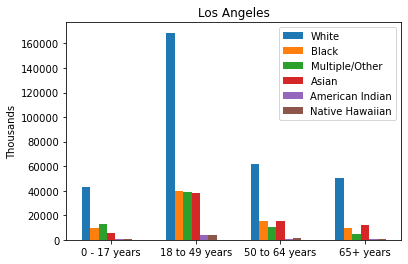

In [55]:
import matplotlib.pyplot as plt
import numpy as np
print(LA_age_race_d)
LA = LA_age_race_d

X = list(LA_age_race_d.keys())
#print(X)
races = ["White","Black","Multiple/Other","Asian","American Indian/Alaska Native","Native Hawaiian/Other Pacific Islander"]
Y1 = []
Y2 = []
Y3 = []
Y4 = []
Ys = []
for j in range(0, len(races)):
    print(races[j])
    y = []
    for i in range(0, len(X)):
        y.append(LA_age_race_d[X[i]][races[j]])
    Ys.append(y)
X_axis = np.arange(len(X))
plt.xticks(X_axis, X)
plt.bar(X_axis - 0.3, Ys[0], 0.1, label='White')
plt.bar(X_axis - 0.2, Ys[1], 0.1, label='Black')
plt.bar(X_axis - 0.1, Ys[2], 0.1, label='Multiple/Other')
plt.bar(X_axis + 0, Ys[3], 0.1, label='Asian')
plt.bar(X_axis + 0.1, Ys[4], 0.1, label='American Indian')
plt.bar(X_axis + 0.2, Ys[5], 0.1, label='Native Hawaiian')
plt.legend()
plt.title("Los Angeles")
plt.ylabel("Thousands")
plt.show()
#plt.bar(range(len(LA)), list(LA.values()), align='center',color='black')
#plt.xticks(range(len(LA)), list(LA.keys()))

#plt.show()
#Deaths by age group

In [66]:
def calcPlotValues(my_d):
    X = list(my_d.keys())
    races = ["White","Black","Multiple/Other","Asian","American Indian/Alaska Native","Native Hawaiian/Other Pacific Islander"]
    Ys = []
    for j in range(0, len(races)):
        y = []
        for i in range(0, len(X)):
            try:
                y.append(my_d[X[i]][races[j]])
            except KeyError:
                y.append(0)
        Ys.append(y)
    return Ys

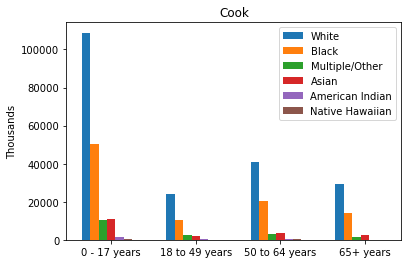

In [70]:
import matplotlib.pyplot as plt
import numpy as np
Ys = calcPlotValues(cook_age_race_d)
X_axis = np.arange(len(X))
plt.xticks(X_axis, X)
plt.bar(X_axis - 0.3, Ys[0], 0.1, label='White')
plt.bar(X_axis - 0.2, Ys[1], 0.1, label='Black')
plt.bar(X_axis - 0.1, Ys[2], 0.1, label='Multiple/Other')
plt.bar(X_axis + 0, Ys[3], 0.1, label='Asian')
plt.bar(X_axis + 0.1, Ys[4], 0.1, label='American Indian')
plt.bar(X_axis + 0.2, Ys[5], 0.1, label='Native Hawaiian')
plt.legend()
plt.title("Cook")
plt.ylabel("Thousands")
plt.show()

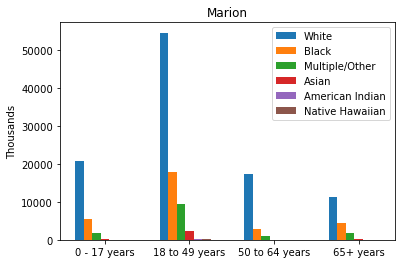

In [89]:
import matplotlib.pyplot as plt
import numpy as np
Ys = calcPlotValues(marion_age_race_d)
X_axis = np.arange(len(X))
plt.xticks(X_axis, X)
plt.bar(X_axis - 0.3, Ys[0], 0.1, label='White')
plt.bar(X_axis - 0.2, Ys[1], 0.1, label='Black')
plt.bar(X_axis - 0.1, Ys[2], 0.1, label='Multiple/Other')
plt.bar(X_axis + 0, Ys[3], 0.1, label='Asian')
plt.bar(X_axis + 0.1, Ys[4], 0.1, label='American Indian')
plt.bar(X_axis + 0.2, Ys[5], 0.1, label='Native Hawaiian')
plt.legend()
plt.title("Marion")
plt.ylabel("Thousands")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
labels = 

In [2]:
def get_states():
    infile = open("CDC_data.csv","r")
    infile.readline()
    states_l = []
    while (True):
        line = infile.readline()
        tokens = line.strip().split(",")
        state = tokens[1]
        if (state not in states_l):
            states_l.append(tokens[1])
        if (len(states_l) == 50):
            break
    states_l.sort()
    return states_l

In [3]:
states_l = get_states()
for i in range(0, len(states_l)):
    if (i == 0):
        print("    if (state == '" + states_l[i] + "'" + " and race in races and age_group in ageGroups):")
        print("        all_states['" + states_l[i] + "'].setdefault(age_group,[]).append(race)")
    else:
        print("    elif (state == '" + states_l[i] + "'" + " and race in races and age_group in ageGroups):")
        print("        all_states['" + states_l[i] + "'].setdefault(age_group,[]).append(race)")

    if (state == 'AK' and race in races and age_group in ageGroups):
        all_states['AK'].setdefault(age_group,[]).append(race)
    elif (state == 'AL' and race in races and age_group in ageGroups):
        all_states['AL'].setdefault(age_group,[]).append(race)
    elif (state == 'AR' and race in races and age_group in ageGroups):
        all_states['AR'].setdefault(age_group,[]).append(race)
    elif (state == 'AZ' and race in races and age_group in ageGroups):
        all_states['AZ'].setdefault(age_group,[]).append(race)
    elif (state == 'CA' and race in races and age_group in ageGroups):
        all_states['CA'].setdefault(age_group,[]).append(race)
    elif (state == 'CO' and race in races and age_group in ageGroups):
        all_states['CO'].setdefault(age_group,[]).append(race)
    elif (state == 'CT' and race in races and age_group in ageGroups):
        all_states['CT'].setdefault(age_group,[]).append(race)
    elif (state == 'DE' and race in races and age_group in ageGr

In [7]:
def get_lines():
    infile = open("CDC_data.csv","r")
    lines = []
    headerLine = infile.readline()
    headers = headerLine.strip().split(",")
    #print(headers)
    while (True):
        line = infile.readline()
        if line == "":
            break;
        lines.append(line)
    return lines

In [8]:
def get_count_dict(state):
    state_dict = {}
    for key in all_states[state]:
        raceDict = {}
        for item in all_states[state][key]:
            raceDict[item] = raceDict.get(item, 0) + 1
        state_dict[key] = raceDict
    return state_dict

In [9]:
states_l = get_states()
#print(states_l)
lines = get_lines()
#print(len(lines))
states_l = get_states()
all_states = {}
for state in states_l:
    all_states[state] = {}
print(all_states)
races = ["White","Black","Multiple/Other","Asian","American Indian/Alaska Native","Native Hawaiian/Other Pacific Islander"]
ageGroups = ["18 to 49 years","50 to 64 years","0 - 17 years","65+ years"]

for line in lines:
    tokens = line.strip().split(",")
    state = tokens[headers.index("res_state")]
    age_group = tokens[headers.index("age_group")]
    race = tokens[headers.index("race")]
    if (state == 'AK' and race in races and age_group in ageGroups):
        all_states['AK'].setdefault(age_group,[]).append(race)
    elif (state == 'AL' and race in races and age_group in ageGroups):
        all_states['AL'].setdefault(age_group,[]).append(race)
    elif (state == 'AR' and race in races and age_group in ageGroups):
        all_states['AR'].setdefault(age_group,[]).append(race)
    elif (state == 'AZ' and race in races and age_group in ageGroups):
        all_states['AZ'].setdefault(age_group,[]).append(race)
    elif (state == 'CA' and race in races and age_group in ageGroups):
        all_states['CA'].setdefault(age_group,[]).append(race)
    elif (state == 'CO' and race in races and age_group in ageGroups):
        all_states['CO'].setdefault(age_group,[]).append(race)
    elif (state == 'CT' and race in races and age_group in ageGroups):
        all_states['CT'].setdefault(age_group,[]).append(race)
    elif (state == 'DE' and race in races and age_group in ageGroups):
        all_states['DE'].setdefault(age_group,[]).append(race)
    elif (state == 'FL' and race in races and age_group in ageGroups):
        all_states['FL'].setdefault(age_group,[]).append(race)
    elif (state == 'GA' and race in races and age_group in ageGroups):
        all_states['GA'].setdefault(age_group,[]).append(race)
    elif (state == 'HI' and race in races and age_group in ageGroups):
        all_states['HI'].setdefault(age_group,[]).append(race)
    elif (state == 'IA' and race in races and age_group in ageGroups):
        all_states['IA'].setdefault(age_group,[]).append(race)
    elif (state == 'ID' and race in races and age_group in ageGroups):
        all_states['ID'].setdefault(age_group,[]).append(race)
    elif (state == 'IL' and race in races and age_group in ageGroups):
        all_states['IL'].setdefault(age_group,[]).append(race)
    elif (state == 'IN' and race in races and age_group in ageGroups):
        all_states['IN'].setdefault(age_group,[]).append(race)
    elif (state == 'KS' and race in races and age_group in ageGroups):
        all_states['KS'].setdefault(age_group,[]).append(race)
    elif (state == 'KY' and race in races and age_group in ageGroups):
        all_states['KY'].setdefault(age_group,[]).append(race)
    elif (state == 'LA' and race in races and age_group in ageGroups):
        all_states['LA'].setdefault(age_group,[]).append(race)
    elif (state == 'MA' and race in races and age_group in ageGroups):
        all_states['MA'].setdefault(age_group,[]).append(race)
    elif (state == 'MD' and race in races and age_group in ageGroups):
        all_states['MD'].setdefault(age_group,[]).append(race)
    elif (state == 'ME' and race in races and age_group in ageGroups):
        all_states['ME'].setdefault(age_group,[]).append(race)
    elif (state == 'MI' and race in races and age_group in ageGroups):
        all_states['MI'].setdefault(age_group,[]).append(race)
    elif (state == 'MN' and race in races and age_group in ageGroups):
        all_states['MN'].setdefault(age_group,[]).append(race)
    elif (state == 'MO' and race in races and age_group in ageGroups):
        all_states['MO'].setdefault(age_group,[]).append(race)
    elif (state == 'MS' and race in races and age_group in ageGroups):
        all_states['MS'].setdefault(age_group,[]).append(race)
    elif (state == 'MT' and race in races and age_group in ageGroups):
        all_states['MT'].setdefault(age_group,[]).append(race)
    elif (state == 'NC' and race in races and age_group in ageGroups):
        all_states['NC'].setdefault(age_group,[]).append(race)
    elif (state == 'ND' and race in races and age_group in ageGroups):
        all_states['ND'].setdefault(age_group,[]).append(race)
    elif (state == 'NE' and race in races and age_group in ageGroups):
        all_states['NE'].setdefault(age_group,[]).append(race)
    elif (state == 'NH' and race in races and age_group in ageGroups):
        all_states['NH'].setdefault(age_group,[]).append(race)
    elif (state == 'NJ' and race in races and age_group in ageGroups):
        all_states['NJ'].setdefault(age_group,[]).append(race)
    elif (state == 'NM' and race in races and age_group in ageGroups):
        all_states['NM'].setdefault(age_group,[]).append(race)
    elif (state == 'NV' and race in races and age_group in ageGroups):
        all_states['NV'].setdefault(age_group,[]).append(race)
    elif (state == 'NY' and race in races and age_group in ageGroups):
        all_states['NY'].setdefault(age_group,[]).append(race)
    elif (state == 'OH' and race in races and age_group in ageGroups):
        all_states['OH'].setdefault(age_group,[]).append(race)
    elif (state == 'OK' and race in races and age_group in ageGroups):
        all_states['OK'].setdefault(age_group,[]).append(race)
    elif (state == 'OR' and race in races and age_group in ageGroups):
        all_states['OR'].setdefault(age_group,[]).append(race)
    elif (state == 'PA' and race in races and age_group in ageGroups):
        all_states['PA'].setdefault(age_group,[]).append(race)
    elif (state == 'RI' and race in races and age_group in ageGroups):
        all_states['RI'].setdefault(age_group,[]).append(race)
    elif (state == 'SC' and race in races and age_group in ageGroups):
        all_states['SC'].setdefault(age_group,[]).append(race)
    elif (state == 'SD' and race in races and age_group in ageGroups):
        all_states['SD'].setdefault(age_group,[]).append(race)
    elif (state == 'TN' and race in races and age_group in ageGroups):
        all_states['TN'].setdefault(age_group,[]).append(race)
    elif (state == 'TX' and race in races and age_group in ageGroups):
        all_states['TX'].setdefault(age_group,[]).append(race)
    elif (state == 'UT' and race in races and age_group in ageGroups):
        all_states['UT'].setdefault(age_group,[]).append(race)
    elif (state == 'VA' and race in races and age_group in ageGroups):
        all_states['VA'].setdefault(age_group,[]).append(race)
    elif (state == 'VT' and race in races and age_group in ageGroups):
        all_states['VT'].setdefault(age_group,[]).append(race)
    elif (state == 'WA' and race in races and age_group in ageGroups):
        all_states['WA'].setdefault(age_group,[]).append(race)
    elif (state == 'WI' and race in races and age_group in ageGroups):
        all_states['WI'].setdefault(age_group,[]).append(race)
    elif (state == 'WV' and race in races and age_group in ageGroups):
        all_states['WV'].setdefault(age_group,[]).append(race)
    elif (state == 'WY' and race in races and age_group in ageGroups):
        all_states['WY'].setdefault(age_group,[]).append(race)
#    if (state == 'CA' and race in races and age_group in ageGroups):
#        CA_dict.setdefault(age_group,[]).append(race)
#print(CA_dict)
CA_age_race_dict = get_count_dict('CA')
print("CA values:")
print(CA_age_race_dict)
HI_age_race_dict = get_count_dict('HI')
print("HI values: ")
print(HI_age_race_dict)


{'AK': {}, 'AL': {}, 'AR': {}, 'AZ': {}, 'CA': {}, 'CO': {}, 'CT': {}, 'DE': {}, 'FL': {}, 'GA': {}, 'HI': {}, 'IA': {}, 'ID': {}, 'IL': {}, 'IN': {}, 'KS': {}, 'KY': {}, 'LA': {}, 'MA': {}, 'MD': {}, 'ME': {}, 'MI': {}, 'MN': {}, 'MO': {}, 'MS': {}, 'MT': {}, 'NC': {}, 'ND': {}, 'NE': {}, 'NH': {}, 'NJ': {}, 'NM': {}, 'NV': {}, 'NY': {}, 'OH': {}, 'OK': {}, 'OR': {}, 'PA': {}, 'RI': {}, 'SC': {}, 'SD': {}, 'TN': {}, 'TX': {}, 'UT': {}, 'VA': {}, 'VT': {}, 'WA': {}, 'WI': {}, 'WV': {}, 'WY': {}}


NameError: name 'headers' is not defined

In [48]:
MS_age_race_dict = get_count_dict('MS')
print("MS values: ")
print(MS_age_race_dict)

MS values: 
{'50 to 64 years': {'American Indian/Alaska Native': 153, 'Black': 4327, 'White': 3370, 'Multiple/Other': 61}, '18 to 49 years': {'White': 8141, 'Black': 11774, 'American Indian/Alaska Native': 504, 'Multiple/Other': 614}, '65+ years': {'White': 4281, 'Black': 3123, 'American Indian/Alaska Native': 12}, '0 - 17 years': {'Black': 2142, 'White': 968, 'American Indian/Alaska Native': 65, 'Multiple/Other': 25}}


In [3]:
infile = open("CDC_data.csv","r")
lines = []
headerLine = infile.readline()
headers = headerLine.strip().split(",")
#print(headers)
count = 0
while (True):
    line = infile.readline()
    if line == "":
        break;
    lines.append(line)
    count+=1
    #if (count > 1000000):
        #break
#print(lines)
ageDict = {}#for age and race data
ageDict2 = {}#for age and gender data
ageDict3 = {}#for age and death data
ageDict4 = {}#for age and exposure data
ageDict5 = {}#for age and comorbidity data
races = ["White","Black","Multiple/Other","Asian","American Indian/Alaska Native","Native Hawaiian/Other Pacific Islander"]
ageGroups = ["18 to 49 years","50 to 64 years","0 - 17 years","65+ years"]
sexes = ["Female","Male","NA"]
underlyingCond = ["No value","Yes","No"]
exposure = ["Missing","Yes","No"]
hospital = ["Missing","No","Unknown","Yes"]
death=["No","Missing","Unknown","NA","Yes"]
symptoms=["Symptomatic","Missing","Unknown","Asymptomatic","nul"]
interval=["No value",0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
for line in lines:
    tokens = line.strip().split(",")
    age_group = tokens[headers.index("age_group")]
    sex = tokens[headers.index("sex")]
    race = tokens[headers.index("race")]
    deceased = tokens[headers.index("death_yn")]
    exposure = tokens[headers.index("exposure_yn")]
    comorbidity = tokens[headers.index("underlying_conditions_yn")]
    if (race in races and age_group in ageGroups):
        ageDict.setdefault(age_group,[]).append(race)
    if (sex in sexes and age_group in ageGroups):
        ageDict2.setdefault(age_group,[]).append(sex)
    if (deceased == "Yes" and age_group in ageGroups):
        ageDict3.setdefault(age_group,[]).append(deceased)
    if (exposure == "Yes" and age_group in ageGroups):
        ageDict4.setdefault(age_group,[]).append(exposure)
    if ((comorbidity == "Yes" or comorbidity == "No") and age_group in ageGroups):
        ageDict5.setdefault(age_group,[]).append(comorbidity)
#print(ageDict)
#2 min for all records

In [13]:
#print(ageDict3)
age_deceased_dict = {}
for key in ageDict3:
    age_deceased_dict[key]= len(ageDict3[key])
print(age_deceased_dict)

{'65+ years': 269269, '50 to 64 years': 26660, '18 to 49 years': 5240}


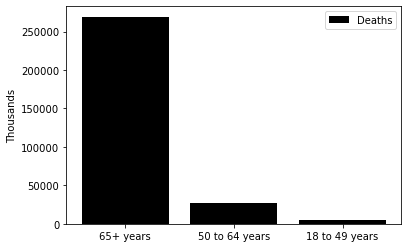

In [15]:
import matplotlib.pyplot as plt

D = age_deceased_dict

plt.bar(range(len(D)), list(D.values()), align='center',color='black')
plt.xticks(range(len(D)), list(D.keys()))
plt.legend(['Deaths'])
plt.ylabel('Thousands')
plt.show()
#Deaths by age group

In [37]:
age_exposure_dict = {}
for key in ageDict4:
    age_exposure_dict[key]= len(ageDict4[key])
sorted_keys2 = sorted(age_exposure_dict)
sorted_age_exposure_dict = {}
for key in sorted_keys2:
    sorted_age_exposure_dict[key] = age_exposure_dict[key]
print(sorted_age_exposure_dict)

{'0 - 17 years': 360477, '18 to 49 years': 1049232, '50 to 64 years': 374266, '65+ years': 303778}


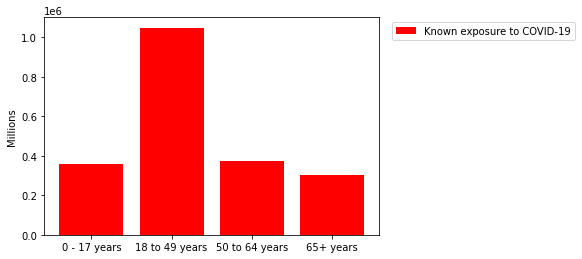

In [41]:
import matplotlib.pyplot as plt

Exp = sorted_age_exposure_dict

plt.bar(range(len(Exp)), list(Exp.values()), align='center',color='red')
plt.xticks(range(len(Exp)), list(Exp.keys()))
plt.legend(['Known exposure to COVID-19'], bbox_to_anchor=(1.6,1), loc='upper right', ncol=1)
plt.ylabel('Millions')
plt.show()
#Known exposure to COVID-19 by age group

In [34]:
age_comorbidity_dict = {}
for key in ageDict5:
    comorbidDict = {}
    for item in ageDict5[key]:
        comorbidDict[item] = comorbidDict.get(item, 0) + 1
    age_comorbidity_dict[key] = comorbidDict
#print(age_comorbidity_dict)
for key in age_comorbidity_dict:
    age_comorbidity_dict[key]["total"] = age_comorbidity_dict[key]["Yes"] + age_comorbidity_dict[key]["No"]
#print(age_comorbidity_dict)
percent_morbid_dict= {}
for key in age_comorbidity_dict:
    percent_morbid_dict[key] = round(100.0*age_comorbidity_dict[key]["Yes"]/age_comorbidity_dict[key]["total"],2)
sorted_keys = sorted(percent_morbid_dict)
sorted_percent_morbid_dict = {}
for key in sorted_keys:
    sorted_percent_morbid_dict[key] = percent_morbid_dict[key]
print(sorted_percent_morbid_dict)

{'0 - 17 years': 93.33, '18 to 49 years': 97.56, '50 to 64 years': 99.08, '65+ years': 99.71}


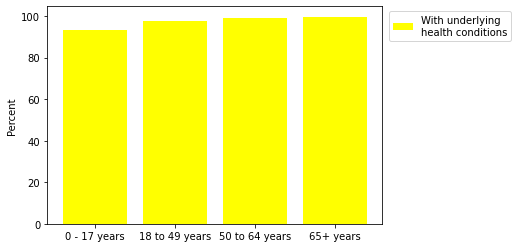

In [35]:
import matplotlib.pyplot as plt

pExp = sorted_percent_morbid_dict

plt.bar(range(len(pExp)), list(pExp.values()), align='center',color='yellow')
plt.xticks(range(len(pExp)), list(pExp.keys()))
plt.legend(['With underlying\nhealth conditions'], bbox_to_anchor=(1.4,1), loc='upper right', ncol=1)
plt.ylabel('Percent')
plt.show()
#Age group by comorbidity

In [7]:
age_race_dict = {}
for key in ageDict:
    raceDict = {}
    for item in ageDict[key]:
        raceDict[item] = raceDict.get(item, 0) + 1
    age_race_dict[key] = raceDict
print(age_race_dict)
#5 sec for all records
#we could make a chart showing for each age group, which race has the highest counts

{'0 - 17 years': {'Black': 372493, 'Native Hawaiian/Other Pacific Islander': 5442, 'White': 1815380, 'American Indian/Alaska Native': 41228, 'Multiple/Other': 186481, 'Asian': 65984}, '18 to 49 years': {'Black': 1570111, 'Multiple/Other': 782495, 'White': 7453597, 'American Indian/Alaska Native': 142019, 'Asian': 401123, 'Native Hawaiian/Other Pacific Islander': 29674}, '50 to 64 years': {'White': 2937094, 'Black': 488366, 'American Indian/Alaska Native': 32504, 'Multiple/Other': 192711, 'Asian': 113692, 'Native Hawaiian/Other Pacific Islander': 5338}, '65+ years': {'Black': 265935, 'White': 2260857, 'American Indian/Alaska Native': 13622, 'Multiple/Other': 96735, 'Asian': 63876, 'Native Hawaiian/Other Pacific Islander': 1751}}


In [8]:
def numByRace(race):
    numDict = {}
    for key in age_race_dict:
        if (race in age_race_dict[key]):
            numDict[key]=age_race_dict[key][race]
        else:
            numDict[key]=0
    return numDict
print(numByRace('Black'))

{'0 - 17 years': 372493, '18 to 49 years': 1570111, '50 to 64 years': 488366, '65+ years': 265935}


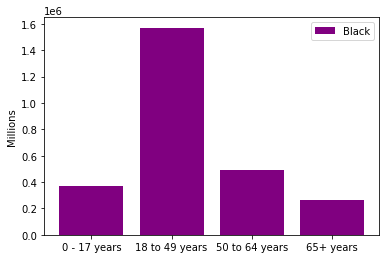

In [18]:
import matplotlib.pyplot as plt
B = numByRace('Black')

plt.bar(range(len(B)), list(B.values()), align='center', color='purple')
plt.xticks(range(len(B)), list(B.keys()))
plt.legend(['Black'])
plt.ylabel('Millions')

plt.show()
#Black

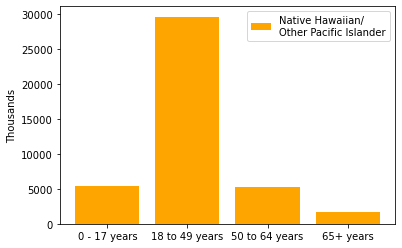

In [14]:
import matplotlib.pyplot as plt
NH = numByRace('Native Hawaiian/Other Pacific Islander')

plt.bar(range(len(NH)), list(NH.values()), align='center', color='orange')
plt.xticks(range(len(NH)), list(NH.keys()))
plt.legend(['Native Hawaiian/\nOther Pacific Islander'])
plt.ylabel('Thousands')


plt.show()
#Native Hawaiian/Pacific Islander

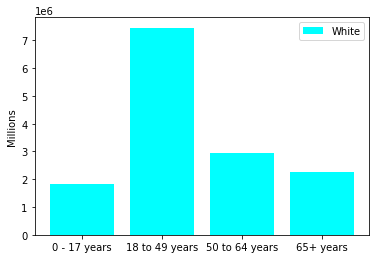

In [17]:
import matplotlib.pyplot as plt
W = numByRace('White')

plt.bar(range(len(W)), list(W.values()), align='center', color='cyan')
plt.xticks(range(len(W)), list(W.keys()))
plt.legend(['White'])
plt.ylabel('Millions')
plt.show()
#White

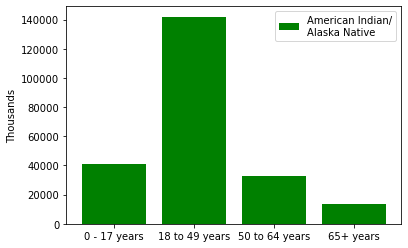

In [20]:
import matplotlib.pyplot as plt
A = numByRace('American Indian/Alaska Native')

plt.bar(range(len(A)), list(A.values()), align='center',color='green')
plt.xticks(range(len(A)), list(A.keys()))
plt.legend(['American Indian/\nAlaska Native'])
plt.ylabel('Thousands')
plt.show()
#American Indian/Alaska Native

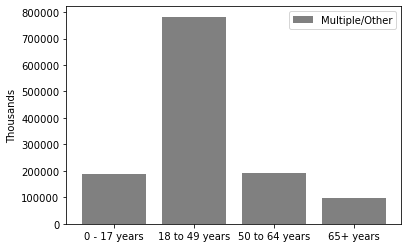

In [21]:
import matplotlib.pyplot as plt
M = numByRace('Multiple/Other')

plt.bar(range(len(M)), list(M.values()), align='center', color='grey')
plt.xticks(range(len(M)), list(M.keys()))
plt.legend(['Multiple/Other'])
plt.ylabel('Thousands')
plt.show()
#Multiple/Other

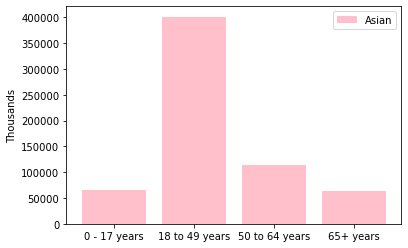

In [9]:
import matplotlib.pyplot as plt
ASI = numByRace('Asian')

plt.bar(range(len(ASI)), list(ASI.values()), align='center',color='pink')
plt.xticks(range(len(ASI)), list(ASI.keys()))
plt.legend(['Asian'])
plt.ylabel('Thousands')
plt.show()
#Asian

In [30]:
age_sex_dict = {}
for key in ageDict2:
    sexDict = {}
    for item in ageDict2[key]:
        sexDict[item] = sexDict.get(item, 0) + 1
    age_sex_dict[key] = sexDict
print(age_sex_dict)
#5 seconds for all records
#we could make a chart showing for each age group, which race has the highest counts
#if we include NA as a category, then it is unclear whether Females really have a higher count or
#if the NA + Males would give similar numbers to Females.
#So, I propose that we look at the gender data organized by ethnicity
#(eg. Black female, Black male, White female, White male etc.)

{'0 - 17 years': {'NA': 130113, 'Female': 2135687, 'Male': 2157702}, '18 to 49 years': {'NA': 250176, 'Female': 8916678, 'Male': 8014975}, '50 to 64 years': {'NA': 136797, 'Female': 3131012, 'Male': 2944134}, '65+ years': {'Female': 2152851, 'Male': 1790839, 'NA': 116998}}


In [31]:
def numBySex(race):
    numDict2 = {}
    for key in age_sex_dict:
        if (race in age_sex_dict[key]):
            numDict2[key]=age_sex_dict[key][sex]
        else:
            numDict2[key]=0
    return numDict2
print(numBySex('NA'))

{'0 - 17 years': 2157702, '18 to 49 years': 8014975, '50 to 64 years': 2944134, '65+ years': 1790839}


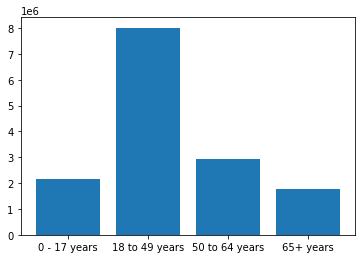

In [32]:
import matplotlib.pyplot as plt
NA = numBySex('NA')

plt.bar(range(len(NA)), list(NA.values()), align='center')
plt.xticks(range(len(NA)), list(NA.keys()))

plt.show()
#NA Gender

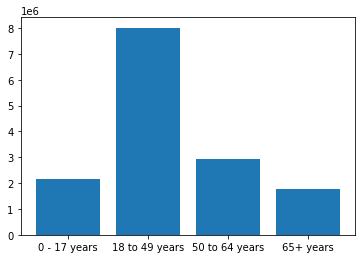

In [33]:
import matplotlib.pyplot as plt
F = numBySex('Female')

plt.bar(range(len(F)), list(F.values()), align='center')
plt.xticks(range(len(F)), list(F.keys()))

plt.show()
#Female Gender

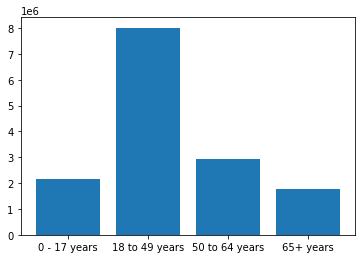

In [34]:
import matplotlib.pyplot as plt
Male = numBySex('Male')

plt.bar(range(len(Male)), list(Male.values()), align='center')
plt.xticks(range(len(Male)), list(Male.keys()))

plt.show()
#Male Gender

In [ ]:
#I think we could do resident state and ethnicity w/gender

In [ ]:
#I think we could do symptom status and gender